# Getting Started with Text Data in Python
## UC Love Data Week

[Reader](https://ucdavisdatalab.github.io/workshop_getting_started_with_textual_data/index.html)

[Recording #1](https://video.ucdavis.edu/media/Getting%20Started%20with%20Textual%20Data%20in%20Python%203-Part%20Series%20%E2%80%93%20Part%201%20of%203%20-%202022-02-14/1_hj51w6hn)

### Going to start with some Python review to make sure I remember basics of how to work with text data

In [1]:
with open("/Users/ankushbharadwaj/Desktop/GettingStartedwTextDatainPython/tm_workshop_data/session_one/shelley_frankenstein.txt", 'r') as f:
    frankenstein = f.read()

So for this above one, I tried moving the tm_workshop_data folder into the same folder as this .ipynb file and using a shorter path but that didn't work. Then I added Desktop/GettingStarted... but that didn't work either. This command didn't work until I found the full path for the text file by dragging it into terminal. 

In [2]:
frankenstein[:500]

'Letter 1\n\n_To Mrs. Saville, England._\n\n\nSt. Petersburgh, Dec. 11th, 17—.\n\n\nYou will rejoice to hear that no disaster has accompanied the\ncommencement of an enterprise which you have regarded with such evil\nforebodings. I arrived here yesterday, and my first task is to assure\nmy dear sister of my welfare and increasing confidence in the success\nof my undertaking.\n\nI am already far north of London, and as I walk in the streets of\nPetersburgh, I feel a cold northern breeze play upon my cheeks, whic'

The mode for the open() call is 'r' becasue we are reading in plain text data, and another option would be binary data or 'rb'. Plain text data is generally some kind of data that uses text characters that humans can read. 

In [3]:
print(frankenstein[:500])

Letter 1

_To Mrs. Saville, England._


St. Petersburgh, Dec. 11th, 17—.


You will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings. I arrived here yesterday, and my first task is to assure
my dear sister of my welfare and increasing confidence in the success
of my undertaking.

I am already far north of London, and as I walk in the streets of
Petersburgh, I feel a cold northern breeze play upon my cheeks, whic


Difference between last two outputs showcases the differences between print conventions and code conventions. 

An important point of note at this moment is that the text is just composed of characters, and this program at this moment doesn't distinguish between the start and end of words and see spaces as just another character that connects "words" in the text together. It's just a character jumble, along with your backslash characters like the newline character /n. 

Changing the program's perception of Frankenstein from a bunch of characters to a bunch of strings (or words) is called tokenizing, which is when we change a long stream of characters into groups of characters, or substrings, also called tokens. Tokens can be characters individually, but these tokens aren't helpful so we want our tokens to be something more meaningful like words. 

In [4]:
doc = frankenstein.split()
doc[:15]

['Letter',
 '1',
 '_To',
 'Mrs.',
 'Saville,',
 'England._',
 'St.',
 'Petersburgh,',
 'Dec.',
 '11th,',
 '17—.',
 'You',
 'will',
 'rejoice',
 'to']

The split() function isolates words based on a passed character that separates groups of words, which at default means that it will split on the whitespace character, since this is the default arguement. This also includes newline and tab characters, \n and \t. 

As we can see from the output in the previous line, this results in tokens of words. Now we can get a unique word count with a for loop. 

In [5]:
word_counts = dict()

for word in doc:
    if word not in word_counts.keys():
        word_counts[word] = 1
    else:
        word_counts[word] += 1

In [6]:
print("Total unique words: ", len(word_counts.keys()))

Total unique words:  11590


In [7]:
print("Total unique words: " f"{len(word_counts.keys())}")

Total unique words: 11590


I did that second print just to put that format of printing back into my memory, this lets me print variables in a print statement in a different way, which could be useful sometime?

Say we want to see the top words, this is what we'd do. 

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame.from_dict(word_counts, columns = ['Count'], orient = 'index')
df = df.sort_values(ascending = False, by = 'Count')
df.head(10)

,Count
the,3897
and,2903
I,2719
of,2634
to,2072
my,1631
a,1338
in,1071
was,992
that,974


This might still have duplicates, so just to check if there are:

In [10]:
print(f" {df[df.index == 'the']} {df[df.index == 'The']}")

      Count
the   3897      Count
The    255


Not super sure why, but this `print(f" {df['the']} {df['The']}")` command didn't run, yet the above did. Just keep this in mind for the future if we can't access the values of a dataframe with indices that aren't numbers and are actually strings. 

Okay well we at least have one duplicate. Looking for more:

In [11]:
df[df.index.str.contains("the")]

,Count
the,3897
their,174
they,166
these,130
then,81
...,...
together;,1
thee.,1
thee?,1
other.,1


In [12]:
df[df.index == df.index.str.contains("the")]

,Count


Okay so the reason for the past few outputs being the way they are is kind of confusing to me at first, but I am guessing I have to subset dataframes with logical vectors, and I can't just subset by calling the index for the row that has information I want like I would do if the indices were numbered. 

There are other instances of "the" being read incorrectly, such as the last "sister-the". From this I will assume that there are others that we can't see due to the print format. 

The reason that we messed up is because we gave the program an incorrect definition of a word. We told the computer to make tokens separated by whitespaces, and that therefore words are strings that are separated by whitespaces, which doesnt' account for all the words in Frankenstein. Furthermore, when a computer compares words, it doesn't compare the meaning of the words like humans would and then decide whether or not they are the same word, the computer compares the words in a very literal character by character sense such that words with the same characters are the same words absolutely and words with different characters are definitely different characters.

This gets into the concept of lexemes, which are the meanings that underlie groups of words and can be used to unite groups of words that a program would otherwise identify as different words. 

To get closer to lexemes, the count of words is combined with the context in which these words appear. These two can help find relationships between words and start to give us interpretations of the text. 

### For now though, the next step is exploring text cleaning options. 

First step is wanting to clean the text, removing punctuation and uppercase/lowercase, maybe even some spelling errors. Steps usually follow like:
* word casing
* punctuation
* numerical characters
* extra whitespaces
* "stop words"

This can be considered "standard" for most projects, but apparently there's a decent amount of variation in which steps we want to include depending on the data we're working with and the questions being asked. 

In [13]:
frankenstein[:500]

'Letter 1\n\n_To Mrs. Saville, England._\n\n\nSt. Petersburgh, Dec. 11th, 17—.\n\n\nYou will rejoice to hear that no disaster has accompanied the\ncommencement of an enterprise which you have regarded with such evil\nforebodings. I arrived here yesterday, and my first task is to assure\nmy dear sister of my welfare and increasing confidence in the success\nof my undertaking.\n\nI am already far north of London, and as I walk in the streets of\nPetersburgh, I feel a cold northern breeze play upon my cheeks, whic'

In [14]:
def count_words(doc):
    doc = doc.split()
    word_counts = dict.fromkeys(set(doc), 0)
    for word in doc:
        word_counts[word] += 1
        
    return word_counts

Alright I just copied this down, but I'm going to run through it line by line and see what it does. So this will take a document, then split it along the default whitespace, but not including the cleaning steps I talked about before. With this split - that I have already found has some problems, I make a set of it, which is a datatype that cannot contain duplicates (there's more to this and maybe after finishing this project **NOTE** check out the details differentiating datatypes because the usage here cuts out a couple lines of code real cleanly and I like it so maybe I can use more of them in the future). Making a set just means that fromkeys() takes a proper set of keys, and the 0 argument is the default value passed to all keys. So then word_counts is basically set up as the empty dict before I start counting the words, which is different than the previous set up, where I built up the dict while counting the words. With the non set doc, I just go thorugh that then and count up the words by accessing the appropriate value in the dict with each word. 

In [15]:
original_word_count = count_words(frankenstein) #this will give me a dict of incorrect word count, I know from before
n_unique_words_original = len(original_word_count) #counting the number of keys, which is the set of the uncleaned split, so we will get a wrong answer here
print("Original word count: ", n_unique_words_original)

Original word count:  11590


In [16]:
print("Pre set word count (not unique): ", len(frankenstein.split())) #just curious

Pre set word count (not unique):  74975


I first want to clean capitalization, and the way I'll do it, I'll "collapse" them together. This is a Hollywood way of saying I'll make everything lowercase.

In [17]:
cleaned = frankenstein.lower()

In [18]:
cleaned_word_count = count_words(cleaned) #get out a dict with hopefully fewer keys because The and the will be treated as the same
n_unique_words_cleaned = len(cleaned_word_count) #again, this should be less than the previous answer, so I am expecting that

print("Cleaned word count: ", n_unique_words_cleaned)
print("How many fewer words: ", n_unique_words_original-n_unique_words_cleaned)

Cleaned word count:  11219
How many fewer words:  371


In [19]:
"The" in cleaned

False

In [20]:
"The" in cleaned_word_count.keys()

False

In [21]:
"The" in original_word_count.keys()

True

So what the above few steps shows me is that "The" is not found in the new cleaned Frankenstein text and the resulting dictionary, showing that the lower() function worked. This is still found in the original Frankenstein text that wasn't cleaned and its resulting dictionary, and the only difference is lower(), so that's good. 

Next is to remove punctuation, and I'm going to work through an example sentence first where I use regular expressions, or regex. **NOTE** this was something that came up and Aktana and was one of the more fun things I worked on, so maybe look into this more I'm sure it's got applications if it's coming up in many different places.  

In [22]:
s = "I'm a self-taught programmer."

import re

print(re.sub(r"[^\w\s]", "", s))

Im a selftaught programmer


So I had to do a little looking up to figure this out, but I will need to do a lot [more](https://regexpattern.com/) to understand that first argument being passed, but the second argument is what will take the place of the pattern passed in the first argument, and the last argument is the string that is being acted upon. 

I feel like a problem with this though is that when I replace all of the punctuation with a nill space, I get non words like Im and selftaught when it would honestly make more sense to split it into I and m as well as self and taught. Even then, when I get a bunch of contractions, I can just look over them and know what the missing letters or proper full word is, because there aren't that many contractions really. Maybe under 15. I could make a dictionary to replace it all as well. I have half a mind to go and do that right now, but maybe just keep that plan in mind for later because I'm hungry and want to finish this section and get some food. 

The solution the seminar poses is to only really address the selftaught of it all, and do the cleaning in steps. I will first clean the - and replace all of them with a space, and then clean the rest and replace them with a nill space. 

In [23]:
s = re.sub(r"-", " ", s)
s = re.sub(r"[^\w\s]", "", s)
print(s)

Im a self taught programmer


The seminar is telling me that there's a difference between en dash and em dash, so I'm going to make sure I can type it out on this keyboard. 

In [24]:
"-" == "––"

False

Yo okay I got it so en dash is just - boom and em dash is hold down OPTION and press -- twice but I didnt hold down OPTION okay I will this time –– boom there we go. It's just that apparently typesetters use –– for dates, and I'm working with Frankenstein. 

In [25]:
cleaned = re.sub(r"[––]", " ", cleaned)
cleaned = re.sub(r"[^\w\s]", "", cleaned)

print(cleaned[:500])

letter 1

_to mrs saville england_


st petersburgh dec 11th 17


you will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings i arrived here yesterday and my first task is to assure
my dear sister of my welfare and increasing confidence in the success
of my undertaking

i am already far north of london and as i walk in the streets of
petersburgh i feel a cold northern breeze play upon my cheeks which
braces my ner


This goes to what I was saying earlier I need to learn about, but the ^\w command apparently accesses everything that isn't a word character, which I assume just means alphabet, but it also includes numbers. But underscores, also called lowlines apparently, are for some reason categorized as word characters, so it's not removed. I need to remove those separately. 

In [26]:
cleaned = re.sub(r"_", "", cleaned)

print(cleaned[:500])

letter 1

to mrs saville england


st petersburgh dec 11th 17


you will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings i arrived here yesterday and my first task is to assure
my dear sister of my welfare and increasing confidence in the success
of my undertaking

i am already far north of london and as i walk in the streets of
petersburgh i feel a cold northern breeze play upon my cheeks which
braces my nerve


Alright I am going to take a break now so I can eat something, but if I don't come back today just know I am at 3.1.3 Removing numbers. 

Okay I ate and I came back but I will probably leave in another 40 to eat some more again and call it for the night then as well. 

I am onto moving numbers. Using regex again. 

In [27]:
cleaned = re.sub(r"[0-9]", "", cleaned)

cleaned_word_count = count_words(cleaned) #remember that this function takes the document and makes a dictionary from the set of the split document and counts the occurrences of each key in this dictionary
n_unique_words_cleaned = len(cleaned_word_count) #and then we take the length of this dictionary so I can get the number of unique words, which should hopefully be less than even before

print("Number of unique words now: ", n_unique_words_cleaned)
print("How many fewer words do I have: ", n_unique_words_original-n_unique_words_cleaned)

Number of unique words now:  7138
How many fewer words do I have:  4452


In [28]:
print(cleaned[:500])

letter 

to mrs saville england


st petersburgh dec th 


you will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings i arrived here yesterday and my first task is to assure
my dear sister of my welfare and increasing confidence in the success
of my undertaking

i am already far north of london and as i walk in the streets of
petersburgh i feel a cold northern breeze play upon my cheeks which
braces my nerves and


It seems like I have everything cleaned out, but the seminar has more words removed at this point than I do? I know that the em dash replace worked because there was one after the date in this first output, and it's not there anymore. I can't find the mistake, so I just have to assume it's code being weird, unless I run into a problem later, then at least I know it started to go awry around here. 

There are a lot of spaces and newline and tab characters, so I will use split() to get rid of them? This will give me a list though, not a big document of text. And didn't I split before, like way before when I was making the word_counts dictionary. Oh so what happened is when I replaced some of the special characters with spaces, there are probably more spaces introduced than before. But still, this step is kinda useless right, I could just use the same word_counts function as before. 

In [29]:
cleaned = cleaned.split()

import pandas as pd

cleaned_counts = pd.Series(cleaned).value_counts()
pd.DataFrame(cleaned_counts, columns = ['Count']).head(25)

,Count
the,4188
and,2970
i,2842
of,2639
to,2092
my,1773
a,1384
in,1127
was,1021
that,1014


Deictics are words that are "hihgly dependent on the contexts in which they appear". That really means nothing to me, but they're used to refer to things bascially. They are very present in most text and can be seen:

<AxesSubplot:xlabel='Word', ylabel='Count'>

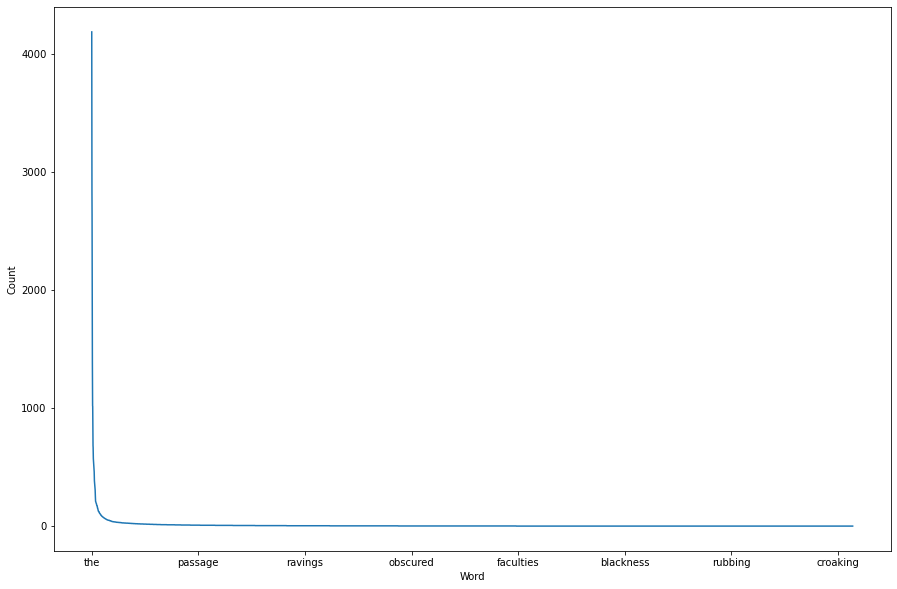

In [30]:
cleaned_counts.plot(figsize = (15,10), ylabel = "Count", xlabel = "Word")

The x axis labels feel so goofy I did not know that series could be graphed even if they had an index of a string, I guess it makes sense that it's possible if they're just treated the same as if they had an index of numbers, but then the information held in the index with labels is pretty lost. 

Anyways this is meant to show that most of the words counted are concentrated in the top however many words most people use very constantly throughout their languages. 

<AxesSubplot:xlabel='Word', ylabel='Count'>

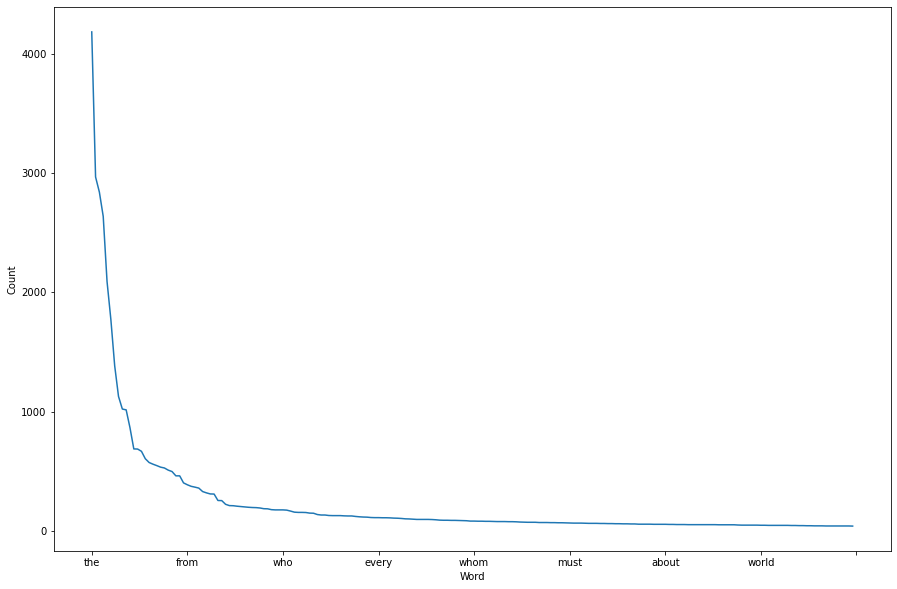

In [31]:
cleaned_counts[:200].plot(figsize = (15,10), ylabel = "Count", xlabel = "Word")

In [32]:
total_words_after_cleaned = cleaned_counts.sum()
words_in_top50 = cleaned_counts[:50].sum()
words_in_top100 = cleaned_counts[:100].sum()
words_in_top150 = cleaned_counts[:150].sum()

print(f"{words_in_top50/total_words_after_cleaned} {words_in_top100/total_words_after_cleaned}{words_in_top150/total_words_after_cleaned}")

0.47732731931247996 0.55380591438027120.5973630831643002


So what this shows me is that the 50 most common words account for 48% of the total words, the next 50 count fo about another 7%, the next 50 for about 4%, which is an insane drop off. 

Not only are some of these very common words skewing the data I am working with, words like the a its etc. don't really add much meaning to the document when analyzing it for meaning. Since I want to understand what Frankenstein is about, these words don't add much to that, and I should do with out them. 

Okay so these words are called stop words, and I can make my own list, but there are many that have been compiled by people doing research in NLP. 

In [33]:
import nltk
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [34]:
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS

nltk_stopwords = stopwords.words('english')
gensim_stopwords = list(STOPWORDS)

print(f"Entries in NLTK {len(nltk_stopwords)} and Entries in GENSIM {len(gensim_stopwords)}")

Entries in NLTK 179 and Entries in GENSIM 337


Okay so I was having a problem with the call to NLTK for some reason, so I had to add the command in the cell above and I think all that did was let me update NLTK. 

In [35]:
list(set(gensim_stopwords).symmetric_difference(set(nltk_stopwords)))[:10]

['describe',
 'amongst',
 'ten',
 'con',
 'six',
 'couldnt',
 'become',
 'two',
 'fire',
 'eleven']

This lets me see some of the stopwords that are in one set but not in the other set. Why does either set of mightn for example, and why does one consider this to be a stop word but the other doesn't. [This](https://www.programiz.com/python-programming/methods/set/symmetric_difference) helped me figure out how to find the difference between these two lists, because my other attempts weren't working and **NOTE** this is another good resource for learning about sets in Python. 

In [36]:
'mightn' in gensim_stopwords

False

In [37]:
'mightn' in nltk_stopwords

True

In [38]:
list(set(gensim_stopwords) - set(nltk_stopwords))[:10]

['due',
 'became',
 'name',
 'always',
 'except',
 'describe',
 'amongst',
 'ten',
 'con',
 'six']

In [39]:
'inc' in gensim_stopwords

True

Okay now this shows, through an application of something I learned real quick about sets, which words are in GENSIM's stopwords but not NLTK's. I definitely learned some of this stuff in discrete math, so it shouldn't be too much effort to learn this again real quick. 

I am going to call it for the day at 3.1.5.2.

---

Picking back up, and where I left off was coping with the fact that stop lists are different, and using a stop list can be risky because there is a strong chance that some words that add meaning to the text will be removed. 

Regardless, the seminar encourages me to use the "conservative" NLTK list, and to also remove any two character, words, because these can be things like th from 17th or st from street. 

In [42]:
stopwords_in_cleaned = cleaned_counts.index.isin(nltk_stopwords) #look at index of the series with unique words I made, find logical vector that tells me which index items are stopwords
stopwords_removed_word_count = cleaned_counts[~stopwords_in_cleaned] #okay it's cool to know that ~ is not I thought it would be !
stopwords_removed_word_count = stopwords_removed_word_count[stopwords_removed_word_count.index.str.len() > 2] 
pd.DataFrame(stopwords_removed_word_count).head(10)

,0
one,202
could,196
would,183
yet,152
man,131
upon,126
life,114
father,113
every,109
might,108


<AxesSubplot:xlabel='Word', ylabel='Count'>

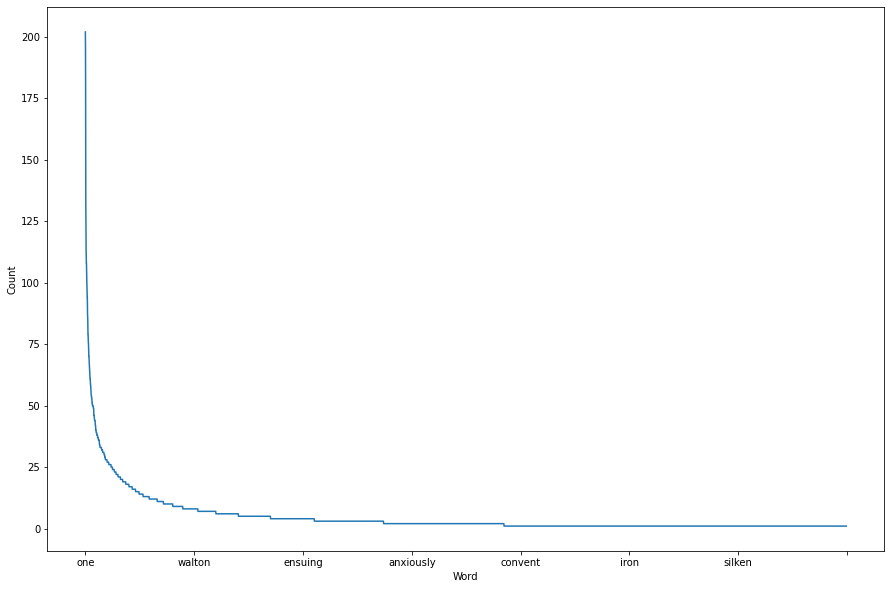

In [43]:
stopwords_removed_word_count.plot(figsize = (15,10), ylabel = "Count", xlabel = "Word")

Before, the y axis ticks peaked at 4000, but it's just 200 now, and that is a pretty strong indiciation that a lot of words have been cut out of the count. 

In [44]:
total_words_after_cleaned = stopwords_removed_word_count.sum()
words_in_top50 = stopwords_removed_word_count[:50].sum()
words_in_top100 = stopwords_removed_word_count[:100].sum()
words_in_top150 = stopwords_removed_word_count[:150].sum()

print(f"{words_in_top50/total_words_after_cleaned} {words_in_top100/total_words_after_cleaned}{words_in_top150/total_words_after_cleaned}")

0.13117665899892264 0.200739597589028320.2524531927903794


And now looking at the proportion of total words taken up by the most common 50, next 50, and the next 50, it also seems like the total count of words isn't largely dictated by the first 50 most common words. It's still the highest proportion, which makes sense, but the next most common 50 words don't make up THAT much smaller of a proportion of the total words, especially compared to before. 

In [45]:
print("Number of unique words now: ", len(stopwords_removed_word_count))

Number of unique words now:  6994


<AxesSubplot:xlabel='Word', ylabel='Count'>

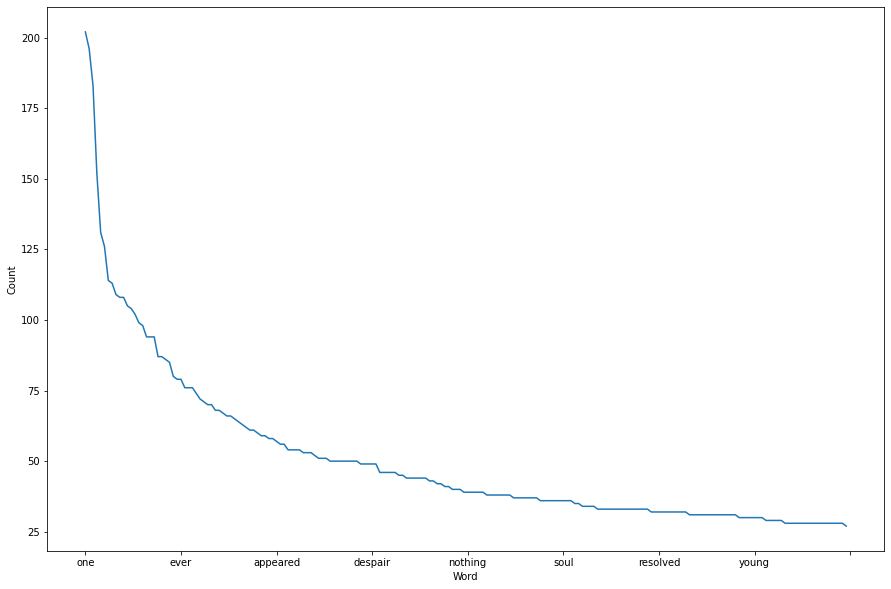

In [46]:
stopwords_removed_word_count[:200].plot(figsize = (15,10), ylabel = "Count", xlabel = "Word")

This seminar actually insists that NLTK is too conservative, and that I would want to remove more words, like one and yet. So I will be using another set of stopwords from something called Voyant.

In [47]:
with open("/Users/ankushbharadwaj/Desktop/GettingStartedwTextDatainPython/tm_workshop_data/voyant_stoplist.txt", 'r') as f:
    voyant_stopwords = f.read().split("\n")

new_stopwords = set(nltk_stopwords).union(set(voyant_stopwords))

stopwords_in_cleaned = cleaned_counts.index.isin(new_stopwords) #look at index of the series with unique words I made, find logical vector that tells me which index items are stopwords
stopwords_removed_word_count = cleaned_counts[~stopwords_in_cleaned] #okay it's cool to know that ~ is not I thought it would be !
stopwords_removed_word_count = stopwords_removed_word_count[stopwords_removed_word_count.index.str.len() > 2] 
pd.DataFrame(stopwords_removed_word_count).head(10)

,0
man,131
life,114
father,113
shall,105
eyes,104
said,102
time,98
saw,94
night,87
elizabeth,86


<AxesSubplot:xlabel='Word', ylabel='Count'>

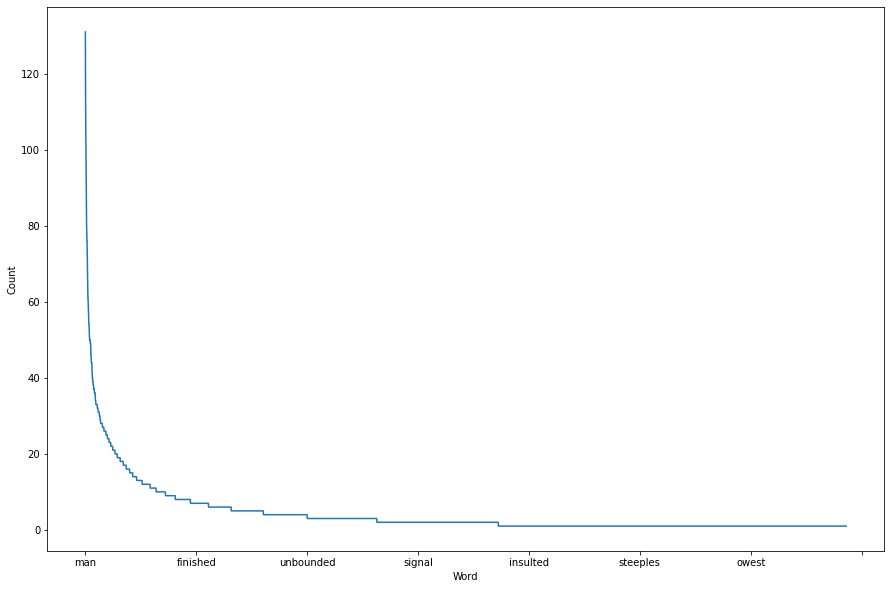

In [48]:
stopwords_removed_word_count.plot(figsize = (15,10), ylabel = "Count", xlabel = "Word")

<AxesSubplot:xlabel='Word', ylabel='Count'>

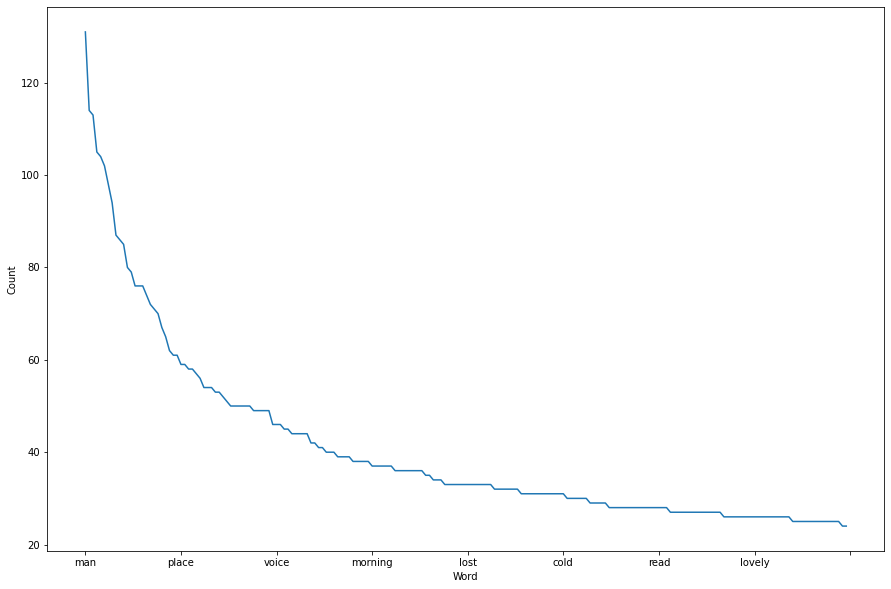

In [49]:
stopwords_removed_word_count[:200].plot(figsize = (15,10), ylabel = "Count", xlabel = "Word")

In [50]:
print("Number of unique words now: ", len(stopwords_removed_word_count))

Number of unique words now:  6863


In [51]:
pd.DataFrame(cleaned_counts).head(10)

,0
the,4188
and,2970
i,2842
of,2639
to,2092
my,1773
a,1384
in,1127
was,1021
that,1014


Compare this to the previous dataframe that I output, and it's pretty clear that a lot ofthe words shown in this output don't add as much meaning to the text, despite their massive presence, compared to the words in the previous dataframe I output. 

### I will finish cleaning with stemming and lemmatizing 
These operations transform words, they don't just remove words like the previous cleaning steps I have run. 

Stemming algorithms reduce words to root forms, such as running and ran and runs all into run or something like that. It also includes collapsing plurals and singulars into one word, which is something I'd imagine wouldn't be too difficult but then English constructs plurals in so many different ways that might be a lot of work to do by hand. 

To do this, I am going to start by using the Porter stemmer from NLTK. 


In [52]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [54]:
to_stem = 'books having running complicated complicity malleability'.split()
for word in to_stem:
    print(f"{word} ==> {stemmer.stem(word)}")

books ==> book
having ==> have
running ==> run
complicated ==> complic
complicity ==> complic
malleability ==> malleabl


The seminar keeps saying that stemming is rule based, which is what explains complicated complicity and malleability going to complic and malleabl instead of complex complicit and malleable for example. The point isn't to get to a word though, because these are very broad rules that are being applied to words, it is supposedly to get a more baggy term that contains more counts and reduce the number of unique words. But words that aren't related, like complicated and complicity, can become related because of this. Also, when I look at complic later, does that mean complex, or complicit? That's up to me, because that extra information was lost by the stemming. 

Lemmatizing can deal with this problem, but is more expensive. This isn't as reductive as stemming, it preserves more words, and it results in a readable word, not things like malleabl or complic. 

Lemmatizers, compared to stemmers, can do this really well because they get part of speech tags, or POS tags, that are attached to each word, and will be used to decide what new bag to put each word into. NLTK does provide something called dependency parsing which tags words. HOWEVER, these work better with stop words and some punctuation words. So if I want to lemmatize my text, I need to remember to do it before beginning the cleaning process. 

New workflow:
* tokenize
* assign POS
* normalze casing
* remove punctuation
* no numerical characters
* whitespaces
* select out stopwords
* lemmatize, because POS has been assigned

In [58]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

sample_string = "The strong coffee, which I had after lunch, was $3. It kept me going the rest of the day."
tokenized = word_tokenize(sample_string)

print(tokenized)

['The', 'strong', 'coffee', ',', 'which', 'I', 'had', 'after', 'lunch', ',', 'was', '$', '3', '.', 'It', 'kept', 'me', 'going', 'the', 'rest', 'of', 'the', 'day', '.']


In [60]:
tagged = nltk.pos_tag(tokenized) #gives a list of tuples
print(tagged)

[('The', 'DT'), ('strong', 'JJ'), ('coffee', 'NN'), (',', ','), ('which', 'WDT'), ('I', 'PRP'), ('had', 'VBD'), ('after', 'IN'), ('lunch', 'NN'), (',', ','), ('was', 'VBD'), ('$', '$'), ('3', 'CD'), ('.', '.'), ('It', 'PRP'), ('kept', 'VBD'), ('me', 'PRP'), ('going', 'VBG'), ('the', 'DT'), ('rest', 'NN'), ('of', 'IN'), ('the', 'DT'), ('day', 'NN'), ('.', '.')]


In [61]:
tagged = pd.DataFrame(tagged, columns = ["Word", "POS"])
tagged

,Word,POS
0,The,DT
1,strong,JJ
2,coffee,NN
3,",",","
4,which,WDT
5,I,PRP
6,had,VBD
7,after,IN
8,lunch,NN
9,",",","


Now I am going to do the steps I said I would do up above after POS tagging. 

In [67]:
tagged['Word'] = tagged['Word'].str.lower()
tagged = tagged[~tagged['Word'].isin([',', '$', '.'])]
tagged = tagged[tagged['Word'].str.isalpha()]
tagged = tagged[~tagged['Word'].isin(new_stopwords)]
tagged

,Word,POS
1,strong,JJ
2,coffee,NN
8,lunch,NN
15,kept,VBD
17,going,VBG
19,rest,NN
22,day,NN


Before continuing with the lemmatizer, the lemmatizer I will use is expecting different tags than what is in the POS column up above. I will need to write a function that will replace the POS column with a tag that the lemmatizer can actually understand. 

In [71]:
lemmatizer = WordNetLemmatizer()

def convert_tag(tag):
    if tag.startswith('J'):
        tag = wordnet.ADJ
    elif tag.startswith('V'):
        tag = wordnet.VERB
    elif tag.startswith('N'):
        tag = wordnet.NOUN
    elif tag.startswith('R'):
        tag = wordnet.ADV
    else:
        tag = ''
    return tag

tagged['New_pos'] = tagged['POS'].apply(convert_tag)
tagged

,Word,POS,New_pos
1,strong,JJ,a
2,coffee,NN,n
8,lunch,NN,n
15,kept,VBD,v
17,going,VBG,v
19,rest,NN,n
22,day,NN,n


In [72]:
def lemmatize_word(word, new_pos):
    if new_pos != '': #i guess this step is supposed to take care of steps where a new POS is not applied, just in case that's something that happens
        lemma = lemmatizer.lemmatize(word, pos = new_pos) 
    else: #assuming that there are no problems in the new POS being generated
        lemma = lemmatizer.lemmatize(word)
    return lemma

tagged['Lemmatized'] = tagged.apply(lambda row: lemmatize_word(row['Word'], row['New_pos']), axis = 1)
tagged

,Word,POS,New_pos,Lemmatized
1,strong,JJ,a,strong
2,coffee,NN,n,coffee
8,lunch,NN,n,lunch
15,kept,VBD,v,keep
17,going,VBG,v,go
19,rest,NN,n,rest
22,day,NN,n,day


### Cleaning is done, but the last step left is chunking
Instead of tokenization breaking the text into individual words, chunking will break the text into groups of words, and this will give me information on phrases that are used. These groups of words are called n-grams, where n is the number of words that are included in each n-gram. 

In [73]:
cleaned[:15]

['letter',
 'to',
 'mrs',
 'saville',
 'england',
 'st',
 'petersburgh',
 'dec',
 'th',
 'you',
 'will',
 'rejoice',
 'to',
 'hear',
 'that']

This still has stopwords, just no punctuation, numbers, and whitespaces. 

In [74]:
cleaned = pd.Series(cleaned)
stopwords_in_cleaned = cleaned.isin(new_stopwords)
stopwords_cleaned = cleaned[~stopwords_in_cleaned]
stopwords_cleaned = stopwords_cleaned[stopwords_cleaned.str.len() > 2] #don't need to do .index.str here because in the previous instance, this series was one of value counts, but here it's just the text

stopwords_cleaned[:15]

0           letter
2              mrs
3          saville
4          england
6      petersburgh
7              dec
11         rejoice
13            hear
16        disaster
18     accompanied
20    commencement
23      enterprise
27        regarded
30            evil
31     forebodings
dtype: object

In [75]:
from nltk import collocations
bigram_measures = collocations.BigramAssocMeasures() #generate "scores", but im told literally nothing about what the seminar wants me to quantify even
bigram_finder = collocations.BigramCollocationFinder.from_words(stopwords_cleaned)

freq = bigram_finder.ngram_fd #this helps me get raw bigram counts, or frequency distribution, but I dont even use the BigramAssocMeasures for this?? lol
bigram_freq = pd.DataFrame(freq.keys(), columns = ['Word', 'Pair'])
bigram_freq.head(10)

,Word,Pair
0,letter,mrs
1,mrs,saville
2,saville,england
3,england,petersburgh
4,petersburgh,dec
5,dec,rejoice
6,rejoice,hear
7,hear,disaster
8,disaster,accompanied
9,accompanied,commencement


In [76]:
freq

FreqDist({('old', 'man'): 32, ('native', 'country'): 15, ('natural', 'philosophy'): 14, ('taken', 'place'): 13, ('fellow', 'creatures'): 11, ('dear', 'victor'): 10, ('long', 'time'): 9, ('short', 'time'): 9, ('young', 'man'): 9, ('life', 'death'): 8, ...})

Okay so freq gives me a dictionary where the keys are the pair, or a tuple, and the values are the score given to this tuple of bigrams for whatever I am scoring right now. 

In [77]:
bigram_freq = bigram_freq.set_index('Word')
bigram_freq['Value'] = freq.values()
bigram_freq = bigram_freq.sort_values("Value", ascending = False)
bigram_freq.head(10)

,Pair,Value
Word,,
old,man,32
native,country,15
natural,philosophy,14
taken,place,13
fellow,creatures,11
dear,victor,10
young,man,9
short,time,9
long,time,9


The next thing I am curious about is how unique some of these phrases are. Maybe that's not the best explanation, it's more like "are these two words something that stick together all the time or do they switch up and stick around with other words as well". For example something like man isn't unique to old man, because even young man is on this list. However, creatures? Creatures might associate more often with fellow than most other words, so there's some correlation between saying fellow and then following up w creatures, or some reason that creatures are preceded with fellow rather than any other word. 

This is done with pointwise mutual information scores, PMI, which measures the association strength of a pair of outcomes. So essentially breaking that down, it measures how strongly related or associated two outcomes are, without knowing the underlying process for generating these two outcomes. "In our case, the higher the score, the more likely a given bigram pair will be with respect to other bigrams in which the two words of the present one appear" is a pretty ugly sentence they put in this seminar imo. 

In [81]:
bigram_pmi = bigram_finder.score_ngrams(bigram_measures.pmi)
bigram_pmi[:10]

[(('achieve', 'treading'), 14.890121748737435),
 (('acti', 'fettered'), 14.890121748737435),
 (('adams', 'supplication'), 14.890121748737435),
 (('adrift', 'homeless'), 14.890121748737435),
 (('advocate', 'stated'), 14.890121748737435),
 (('agents', 'creators'), 14.890121748737435),
 (('aggravation', 'infamy'), 14.890121748737435),
 (('agile', 'subsist'), 14.890121748737435),
 (('alterations', 'tranquilly'), 14.890121748737435),
 (('american', 'hemisphere'), 14.890121748737435)]

So this outputs a similar type of file as the previous time, except this time instead of a dictionary, I get a list of tuples, where the first item of the tuple is another tuple which includes the bigram, which corresponds to the score, the second item of the tuple. 

In [83]:
pmi_df = pd.DataFrame(bigram_pmi, columns = ['Bigrams', 'PMI'])
pmi_df.head(10)

,Bigrams,PMI
0,"(achieve, treading)",14.890122
1,"(acti, fettered)",14.890122
2,"(adams, supplication)",14.890122
3,"(adrift, homeless)",14.890122
4,"(advocate, stated)",14.890122
5,"(agents, creators)",14.890122
6,"(aggravation, infamy)",14.890122
7,"(agile, subsist)",14.890122
8,"(alterations, tranquilly)",14.890122
9,"(american, hemisphere)",14.890122


In [84]:
pmi_df['Word'] = pmi_df['Bigrams'].apply(lambda x: x[0])
pmi_df['Pair'] = pmi_df['Bigrams'].apply(lambda x: x[1])
pmi_df

,Bigrams,PMI,Word,Pair
0,"(achieve, treading)",14.890122,achieve,treading
1,"(acti, fettered)",14.890122,acti,fettered
2,"(adams, supplication)",14.890122,adams,supplication
3,"(adrift, homeless)",14.890122,adrift,homeless
4,"(advocate, stated)",14.890122,advocate,stated
...,...,...,...,...
28979,"(said, man)",1.184273,said,man
28980,"(man, eyes)",1.156259,man,eyes
28981,"(man, shall)",1.142453,man,shall
28982,"(shall, man)",1.142453,shall,man


In [86]:
pmi_df.drop(columns = ['Bigrams'], inplace = True)
pmi_df.set_index('Word', inplace = True)
pmi_df

,PMI,Pair
Word,,
achieve,14.890122,treading
acti,14.890122,fettered
adams,14.890122,supplication
adrift,14.890122,homeless
advocate,14.890122,stated
...,...,...
said,1.184273,man
man,1.156259,eyes
man,1.142453,shall


In [87]:
pmi_df[:25]

,PMI,Pair
Word,,
achieve,14.890122,treading
acti,14.890122,fettered
adams,14.890122,supplication
adrift,14.890122,homeless
advocate,14.890122,stated
agents,14.890122,creators
aggravation,14.890122,infamy
agile,14.890122,subsist
alterations,14.890122,tranquilly


In [88]:
pmi_df[-25:]

,PMI,Pair
Word,,
elizabeth,1.849147,time
thought,1.847778,life
heart,1.822015,father
death,1.809304,life
eyes,1.780291,mind
eyes,1.746739,night
time,1.720823,saw
man,1.608771,feelings
eyes,1.574972,time


What this shows me is that there are a lot of words and pairs at the bottom of this dataframe that can be combined, and are combined, with many other words to make many possible bigrams that have either of these words. On the other hand, there are no repeats at the top of the dataframe, showing that the higher scores of these bigrams is related to how often the words that compose these bigrams show up in other bigrams.

Okay, so there's still three more chapters left, but I am going to take a little break to eat something and go for a walk before coming back and finishing them.

-- 

I took kind of a long break because there are so many chapters left and my head is feeling pretty tired. 

### Analyzing a corpus - or collection - of texts, not just one

Looking at a text in the context of others, by for example comparing Frankenstein to other similar novels, either by genre, era, author, etc., would show me not only qualities of Frankenstein, but qualities that Frankenstein either holds alone or shares with other novels. 

The seminar is going to have me use about 380 obituaries from NYT, which is pretty dark, and instead of reading all of that in at once, I will be loading in a file manifest first.

In [89]:
import pandas as pd
manifest = pd.read_csv("/Users/ankushbharadwaj/Desktop/GettingStartedwTextDatainPython/tm_workshop_data/session_two/manifest.csv", index_col = 0)
manifest['YEAR'] = pd.to_datetime(manifest['YEAR'], format = "%Y").dt.year
            
manifest.head(10)

,NAME,YEAR,FILE_NAME
0,Ada Lovelace,1852,000.txt
1,Robert E Lee,1870,001.txt
2,Andrew Johnson,1875,002.txt
3,Bedford Forrest,1877,003.txt
4,Lucretia Mott,1880,004.txt
5,Charles Darwin,1882,005.txt
6,Ulysses Grant,1885,006.txt
7,Mary Ewing Outerbridge,1886,007.txt
8,Emma Lazarus,1887,008.txt
9,Louisa M Alcott,1888,009.txt


In [91]:
print("Number of obits: ", len(manifest))
print("Number of unique obits: ", manifest['NAME'].nunique())

Number of obits:  379
Number of unique obits:  378


In [92]:
date_range = range(manifest['YEAR'].min(), manifest['YEAR'].max()+5, 5)
print(date_range)
print(manifest['YEAR'].min())
print(manifest['YEAR'].max())

range(1852, 2012, 5)
1852
2007


In [93]:
obits_each_year = manifest.groupby('YEAR')['NAME'].count()
obits_each_year

YEAR
1852     1
1870     1
1875     1
1877     1
1880     1
        ..
1997     3
1998    10
1999     3
2000     3
2007     1
Name: NAME, Length: 108, dtype: int64

<AxesSubplot:title={'center':'Number of Obits/Year'}, xlabel='Year', ylabel='Count'>

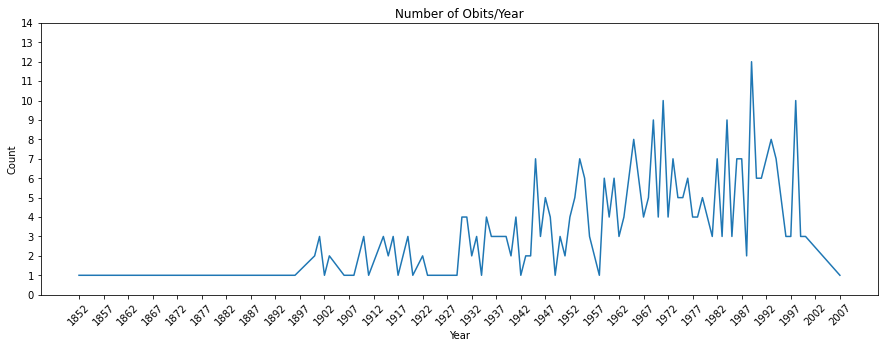

In [94]:
obits_each_year.plot(figsize = (15,5), title = 'Number of Obits/Year', xlabel = 'Year', ylabel = 'Count', xticks = date_range, yticks = range(0,15), rot = 45)

The direction to take now is to clean all of the text files of all the obituaries. The steps needed are to resolve casing, remove punctuation and formatting (extra whitespaces) and numbers, and get rid of stopwords. I do not need to lemmatization, since this dataset was already lemmatized beforehand since it's an intense task. 

In [95]:
import re

with open("/Users/ankushbharadwaj/Desktop/GettingStartedwTextDatainPython/tm_workshop_data/voyant_stoplist.txt", 'r') as f:
    stopwords = f.read().split("\n")
    
def to_lower(doc):
    return doc.lower()

def remove_punctuation(doc):
    doc = re.sub(r"[-]|[–]|[_]", " ", doc)
    doc = re.sub(r"[^\w\s]", "", doc)
    return doc

def remove_digits(doc):
    return re.sub(r"[0-9]", "", doc)

def remove_whitespaces(doc):
    return re.sub(r"\s+", " ", doc)

def remove_stop_words(doc):
    doc = doc.split()
    doc = [token for token in doc if token not in stopwords]
    doc = [token for token in doc if len(token) > 2]
    doc = ' '.join(doc)
    return doc

def clean(doc):
    lowercase = to_lower(doc)
    no_punct = remove_punctuation(lowercase)
    no_digits = remove_digits(no_punct)
    no_ws = remove_whitespaces(no_digits)
    no_stopwords = remove_stop_words(no_ws)
    return no_stopwords

Now that I have all the functions I will use to do my cleaning set up, I can proceeed with the cleaning. Before, I need to know what I will be doing with the cleaned data, which is that I will add each cleaned obituary, which will be a long string at the end of the `clean()` function, to a list in the order that they are found. 

In [97]:
indir = "/Users/ankushbharadwaj/Desktop/GettingStartedwTextDatainPython/tm_workshop_data/session_two/input/"
corpus = []

for title in manifest.index:
    filepath = indir + manifest.loc[title, 'FILE_NAME']
    with open(filepath, 'r') as f:
        text = f.read()
        cleaned = clean(text)
        corpus.append(cleaned)                                    

In [99]:
len(corpus) == len(manifest)

True

While the manifest includes cursory information like the name of the textfile, date of the obit, and obit name, the corpus includes none of this information and instead contains the cleaned textual data from the manifest file. 

Just like the pointwise mutual information scores that relates each word or set of words with each other, I need something that realtes each text to each other. 
### Doing this will build a Document Term Matrix (DTM)
This is a matrix that contains the frequences of all the terms in a corpus such that each row is a document and each column is a term and the cells are populated by a measure of how often the word of that column appears in the document of that row. 

This is an example of a DTM made for a set of three documents:
* I like cats. Do you?
* I only like dogs. And you?
* I like cats and dogs.

In [100]:
example_corpus = [[1, 0, 1, 1, 0, 0, 1, 1],
                  [1, 1, 1, 0, 1, 1, 0, 1],
                  [1, 0, 1, 1, 1, 1, 0, 0]]

example_dtm = pd.DataFrame(example_corpus, 
                           index = ['D1', 'D2', 'D3'], 
                           columns = ['i', 'only', 'like', 'cats', 'and', 'dogs', 'do', 'you']
                          )

example_dtm

,i,only,like,cats,and,dogs,do,you
D1,1,0,1,1,0,0,1,1
D2,1,1,1,0,1,1,0,1
D3,1,0,1,1,1,1,0,0


This is sick because I can really easily see what terms show up in what documents and which documents have similar groups of terms, and honeslty much much more. 

Okay, now I am going to do this for the actual data I'm using. 

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
vectorized_corpus = count_vectorizer.fit_transform(corpus)

vectorized_corpus[:10]

<10x32548 sparse matrix of type '<class 'numpy.int64'>'
	with 8336 stored elements in Compressed Sparse Row format>

Alright so `count_vectorizer.fit_transform` returns whats called a sparse matrix, which has mostly 0s and is this way to save space. Normally, these are two calls I can do on this to get some information.

In [103]:
print("Number of documents/rows: ", vectorized_corpus.shape[0])
print("Number of terms/columns: ", vectorized_corpus.shape[1])

Number of documents/rows:  379
Number of terms/columns:  32548


Seminar is telling me that this is a small corpus, so I can make it a dataframe and check it out. 

In [104]:
dtm = pd.DataFrame(vectorized_corpus.toarray())
dtm.iloc[:5, 100:115]

,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114
0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Even though this doesn't have useful information in the row and column names, it's really easy to add this on with the manifest and some methods attached to CountVectorizer().

In [105]:
dtm.columns = count_vectorizer.get_feature_names_out()
dtm.index = manifest['NAME']
dtm.iloc[:5, 100:115]

,absorb,absorbed,absorption,abstain,abstemious,abstemiousness,abstention,abstinence,abstinent,abstract,abstraction,abstractions,abstracts,abstruse,absurd
NAME,,,,,,,,,,,,,,,
Ada Lovelace,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
Robert E Lee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Andrew Johnson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bedford Forrest,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Lucretia Mott,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### With a nice representation of the corpus, I can analyze it now
First, I will count the number of tokens in each text, and assign the result to the manifest data. 

In [106]:
import numpy as np
manifest['num_tokens'] = dtm.apply(sum, axis = 1).values #should give total word count except without any words removed, but not unique word count
manifest.head(10)

,NAME,YEAR,FILE_NAME,num_tokens
0,Ada Lovelace,1852,000.txt,502
1,Robert E Lee,1870,001.txt,638
2,Andrew Johnson,1875,002.txt,1405
3,Bedford Forrest,1877,003.txt,1038
4,Lucretia Mott,1880,004.txt,150
5,Charles Darwin,1882,005.txt,915
6,Ulysses Grant,1885,006.txt,17550
7,Mary Ewing Outerbridge,1886,007.txt,443
8,Emma Lazarus,1887,008.txt,396
9,Louisa M Alcott,1888,009.txt,503


In [107]:
manifest_plotter = manifest.sort_values('num_tokens', ascending = False).reset_index(drop = True)
manifest_plotter.head(10)

,NAME,YEAR,FILE_NAME,num_tokens
0,Ulysses Grant,1885,006.txt,17550
1,Queen Victoria,1901,017.txt,7211
2,Adolph S Ochs,1935,068.txt,6441
3,Adolf Hitler,1945,097.txt,6330
4,Mao Tse Tung,1976,242.txt,5849
5,Harry S Truman,1945,093.txt,4904
6,Pablo Picasso,1973,228.txt,3718
7,Indira Gandhi,1984,282.txt,3467
8,Richard Nixon,1994,345.txt,3459
9,Joseph Pulitzer,1911,030.txt,3407


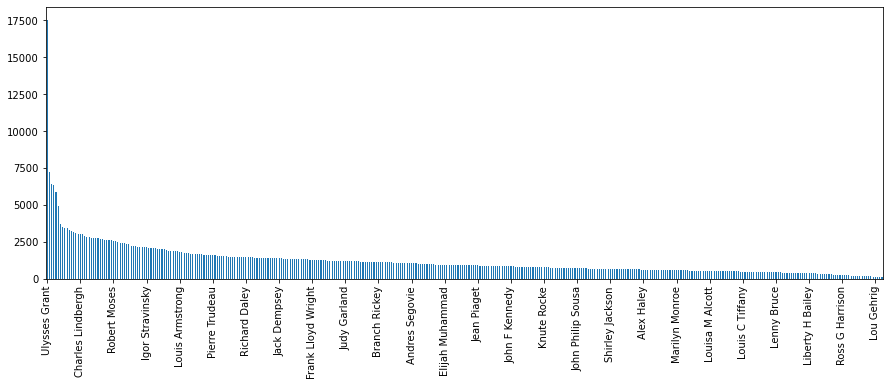

In [110]:
ax = manifest_plotter.plot.bar(figsize = (15,5), y = 'num_tokens', legend = False, xticks = manifest_plotter[::15].index)
ax.set_xticklabels(manifest_plotter[::15]['NAME']);

The `;` after `ax.set_xticklabels...` is there to suppress any print output from this command, like there'd be some lines of print output above the plot normally, but it's been removed. 

Unique words are also called types, so counting unique words can be said like counting types. Anyways that's the next step. 

In [112]:
manifest['num_types'] = dtm.apply(np.count_nonzero, axis = 1).values #should give total word count except without any words removed, but not unique word count
manifest.head(10)

,NAME,YEAR,FILE_NAME,num_tokens,num_types
0,Ada Lovelace,1852,000.txt,502,340
1,Robert E Lee,1870,001.txt,638,427
2,Andrew Johnson,1875,002.txt,1405,806
3,Bedford Forrest,1877,003.txt,1038,633
4,Lucretia Mott,1880,004.txt,150,113
5,Charles Darwin,1882,005.txt,915,614
6,Ulysses Grant,1885,006.txt,17550,4441
7,Mary Ewing Outerbridge,1886,007.txt,443,288
8,Emma Lazarus,1887,008.txt,396,324
9,Louisa M Alcott,1888,009.txt,503,350


Alright so I got in my head a little on this, but the previous apply that used sum took a sum across the row, which meant I got out the total number of words in that row. This np.count_nonzero function counts the number of elements in this row that aren't 0, but doesn't sum them up. So for Ada Lovelace, her obit had 502 total words, but seems like only 340 were unique words and some were said multiple times in her obit.

Now, I can measure lexical diversity, and I will be using type token ratio, TTR, which shows "how much the vocabulary of a text varies over its tokens". That's a really really really bad explanation. The metric is essentially number of unique words / number of total words, which gives me a measure of how many unique words there are relative to the total number of words in this text, which then tells me how many different words this text uses, or its lexical diversity. This is nearly impossible to find organically, but a text with TTR of 100 never repeats a word. 

In [113]:
manifest['TTR'] = manifest['num_types']/manifest['num_tokens'] * 100
manifest.head(10)

,NAME,YEAR,FILE_NAME,num_tokens,num_types,TTR
0,Ada Lovelace,1852,000.txt,502,340,67.729084
1,Robert E Lee,1870,001.txt,638,427,66.927900
2,Andrew Johnson,1875,002.txt,1405,806,57.366548
3,Bedford Forrest,1877,003.txt,1038,633,60.982659
4,Lucretia Mott,1880,004.txt,150,113,75.333333
5,Charles Darwin,1882,005.txt,915,614,67.103825
6,Ulysses Grant,1885,006.txt,17550,4441,25.304843
7,Mary Ewing Outerbridge,1886,007.txt,443,288,65.011287
8,Emma Lazarus,1887,008.txt,396,324,81.818182
9,Louisa M Alcott,1888,009.txt,503,350,69.582505


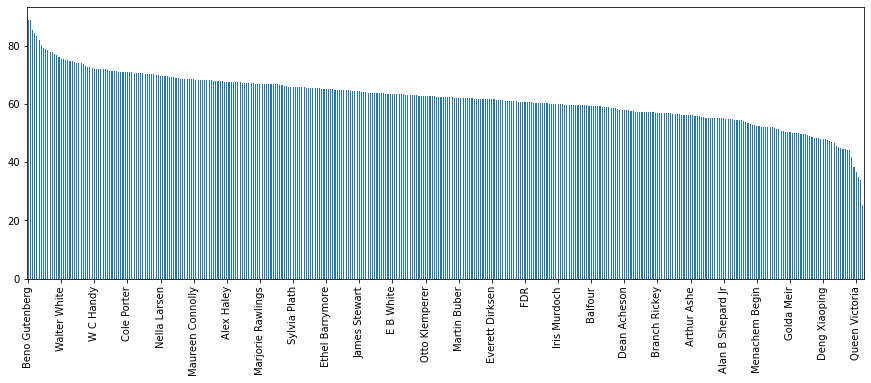

In [114]:
manifest_plotter = manifest.sort_values('TTR', ascending = False).reset_index(drop = True)
ax = manifest_plotter.plot.bar(figsize = (15,5), y = 'TTR', legend = False, xticks = manifest_plotter[::15].index)
ax.set_xticklabels(manifest_plotter[::15]['NAME']);

### The next set of metrics will look at term frequency

In [116]:
dtm.sum() #gives me the number of times each term appeared in the corpus as a whole

aachen       3
aahs         1
aane         1
aarau        1
aaron       10
            ..
zula         2
zululand     3
zurich      31
zvai         1
zwilich      1
Length: 32548, dtype: int64

In [118]:
dtm.sum(axis = 1) #this wasn't part of the seminar but I just wanted to see it

NAME
Ada Lovelace           502
Robert E Lee           638
Andrew Johnson        1405
Bedford Forrest       1038
Lucretia Mott          150
                      ... 
King Hussein          2617
Pierre Trudeau        1574
Elliot Richardson      668
Charles M Schulz      2441
Karen Sparck Jones     570
Length: 379, dtype: int64

In [119]:
dtm.sum().sort_values(ascending = False).head(10)

year         3657
say          2630
new          2350
make         2234
time         2153
work         1739
become       1641
life         1556
war          1505
president    1503
dtype: int64

In [120]:
dtm.sum().sort_values(ascending = False).tail(10)

karol          1
karp           1
karrafa        1
kars           1
kashevaroff    1
kasino         1
kassarjian     1
kasserine      1
kathiawar      1
zwilich        1
dtype: int64

Theres a word for terms that are only said once, and this seminar doesn't hesitate to tell me that htey can speak multiple languages because it's called hapax legomenon and it's told to me like something important that everyone in the industry knows about. 

In [122]:
hapaxes = dtm.sum()[dtm.sum() == 1]
print(f"{len(hapaxes)} exist in this corpus")
print("Which is ", len(hapaxes)/len(dtm.T), "of the words in the corpus")

13004 exist in this corpus
Which is  0.3995329974191963 of the words in the corpus


In [123]:
dtm.sum().quantile(.95)

53.0

This last command tells me what the 95th quantile of the `dtm.sum()` command is, which tells me that this is the value of 53, meaning that words that occur more than 53 times in the entire corpus are above the 95th quantile. 

In [124]:
len(dtm.sum()[dtm.sum() > 53.0])

1611

Now THIS tells me how many unique words are above the 95th quantile. 

<AxesSubplot:>

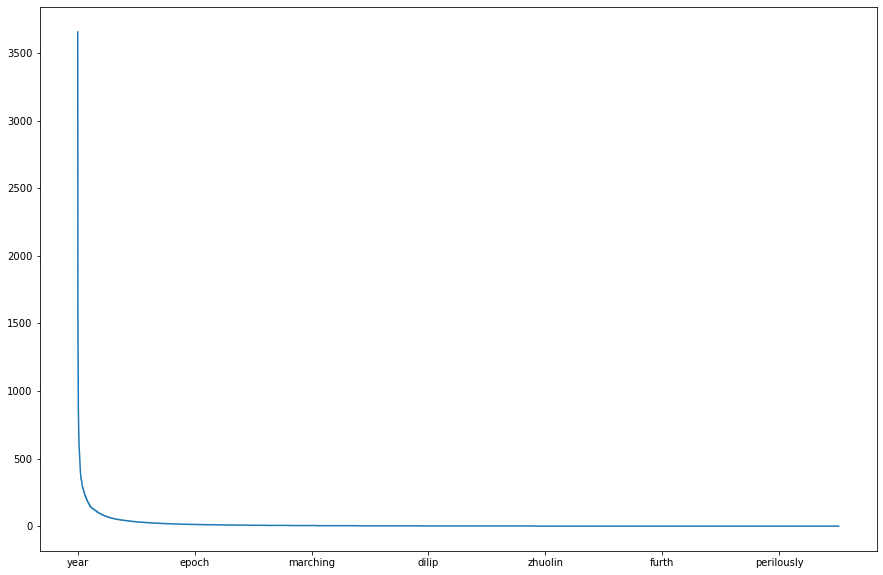

In [125]:
dtm.sum().sort_values(ascending = False).plot(figsize = (15,10))

This looks like a plot from before and apparently it's something called a Zipfian distribution which stems from [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law) **NOTE** and this really began being applied in computational linguistics so that's cool. 

The problem I am facing here is that there are some words that are over represented maybe? But I don't necessarily want to remove year, because that might be important to an obit's meaning. So what I want to find is a metric that controls for the increased frequency of very common words instead of just regular frequency, because as I have established, regular frequency results in skewed data that overepresents a few words as having more of an impact or play in the corpus than they might actually.

The answer is to weight scores with tf-idf scores. Even typing idf is tiring it's **FREE PALESTINE** until death baby. This stands for term frequency inverse document frequency, which is a score that has the term frequency and then the inverse (or 1/...) document frequency. The name document frequency could give me more, but it means how many documents the term appears within. By including the inverse document frequency part, terms that are very frequent in a document have their score reduced proportional to how many other documents this term appears in. What this means is that the tf-idf score tells me how important each term is to the meaning of the document. 

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
vectorized_with_tfidf = tfidf_vectorizer.fit_transform(corpus)
vectorized_with_tfidf

<379x32548 sparse matrix of type '<class 'numpy.float64'>'
	with 252160 stored elements in Compressed Sparse Row format>

In [127]:
tfidf_df = pd.DataFrame(vectorized_with_tfidf.toarray(), 
                        index = manifest['NAME'], 
                        columns = tfidf_vectorizer.get_feature_names_out() #this function pretty litty, get_feature_names_out() i mean
                       )
tfidf_df.iloc[:5, 100:115]

,absorb,absorbed,absorption,abstain,abstemious,abstemiousness,abstention,abstinence,abstinent,abstract,abstraction,abstractions,abstracts,abstruse,absurd
NAME,,,,,,,,,,,,,,,
Ada Lovelace,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.055834,0.0,0.0,0.0,0.0,0.0
Robert E Lee,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Andrew Johnson,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Bedford Forrest,0.0,0.0,0.0,0.0,0.023602,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Lucretia Mott,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

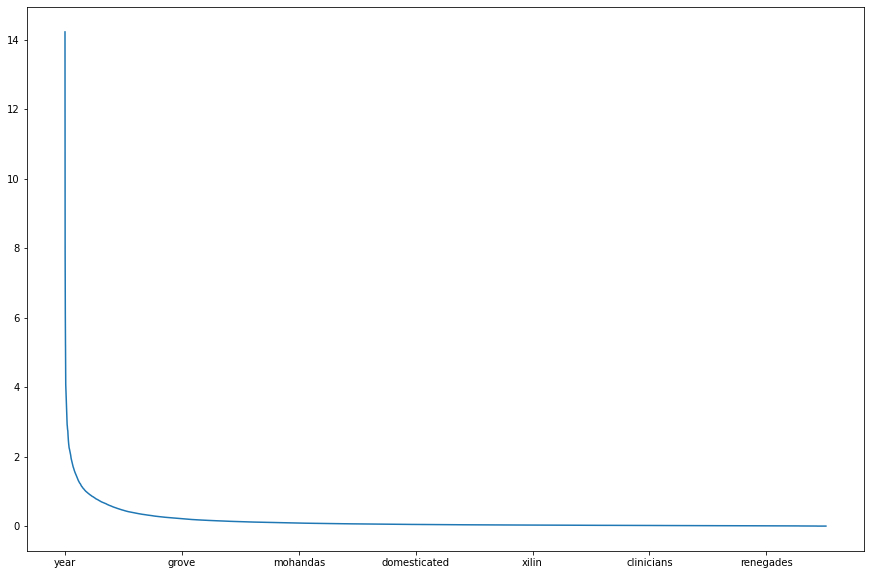

In [128]:
tfidf_df.sum().sort_values(ascending = False).plot(figsize = (15,10))

In [129]:
dtm.sum().sort_values(ascending = False).head(10) #from before

year         3657
say          2630
new          2350
make         2234
time         2153
work         1739
become       1641
life         1556
war          1505
president    1503
dtype: int64

In [131]:
tfidf_df.sum().sort_values(ascending = False).head(10)

year         14.225657
say          10.228583
miss          9.847273
new           9.228323
make          8.481269
time          8.181256
work          7.918881
president     7.393490
write         6.995420
life          6.894825
dtype: float64

Generally, raw counts will give me more information about general nouns and verbs, while tf-idf scores tells me what proper nouns the text relates to usually, since proper nouns like names and places are less likely to be replicated in other texts, which probably have their own set of proper nouns that relates closest to this text. 

Taking a break to eat, at 4.4.4. Come back and finish this up and then call it a day. 

And I'm back. The next thing I want to look into term correlations, which is information that would tell me if terms are correlated. This means that a term appears usually in the same document as another term if they are positively correlated, and they don't appear in the same document if they are negatively correlated. Kind of like how the pointwise mutual information scores told me how related two tokens in a tuple are to each other. Instead of grouping words by whether or not they appear as bigrams as in PMI, here I will be grouping words by how similar their tf-idf scores are, which would give me words that appear in the same documents at similar tf-idfs, for example.  

In [134]:
five_random_tokens = tfidf_df.columns[np.random.choice(len(tfidf_df.columns), 5)]
tfidf_df[five_random_tokens].corr().stack()

damrosch    damrosch      1.000000
            morale       -0.006565
            overweight   -0.002646
            murdoch      -0.002646
            wellspring   -0.004191
morale      damrosch     -0.006565
            morale        1.000000
            overweight   -0.006565
            murdoch      -0.006565
            wellspring   -0.010401
overweight  damrosch     -0.002646
            morale       -0.006565
            overweight    1.000000
            murdoch      -0.002646
            wellspring   -0.004191
murdoch     damrosch     -0.002646
            morale       -0.006565
            overweight   -0.002646
            murdoch       1.000000
            wellspring   -0.004191
wellspring  damrosch     -0.004191
            morale       -0.010401
            overweight   -0.004191
            murdoch      -0.004191
            wellspring    1.000000
dtype: float64

In [135]:
four_selected_terms = {"artist": "paint", "sword": "ship"}

for term in four_selected_terms:
    print(f"Correlation between {term} and {four_selected_terms[term]} is {tfidf_df[term].corr(tfidf_df[four_selected_terms[term]])}")

Correlation between artist and paint is 0.6918207826061047
Correlation between sword and ship is -0.009130230752989743


In [142]:
print(tfidf_df['artist'].describe())
print('-')
print(tfidf_df['paint'].describe())

count    379.000000
mean       0.005862
std        0.020466
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.262750
Name: artist, dtype: float64
-
count    379.000000
mean       0.002990
std        0.014718
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.143787
Name: paint, dtype: float64


In [143]:
print(tfidf_df['sword'].describe())
print('-')
print(tfidf_df['ship'].describe())

count    379.000000
mean       0.000876
std        0.006290
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.072401
Name: sword, dtype: float64
-
count    379.000000
mean       0.002469
std        0.009251
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.066381
Name: ship, dtype: float64


Yeah I know that's not necessarily the best check of similarity, but it seems to indicate that the list of tf-idf values for artist and paint are closer to each other than the list of tf-idf values for sword and ship are to each other. 

Okay I am going to call it for the day. Just going to save the tfidf dataframe, maybe do more of this tomorrow, but I'll probably finish up the last two chapters after the weekend. 

In [145]:
outdir = "/Users/ankushbharadwaj/Desktop/GettingStartedwTextDatainPython/tm_workshop_data/session_two/output/"
tfidf_df.to_csv(outdir + "tfidf_df.csv")